In [25]:
import numpy as np
import matplotlib.pyplot as plt

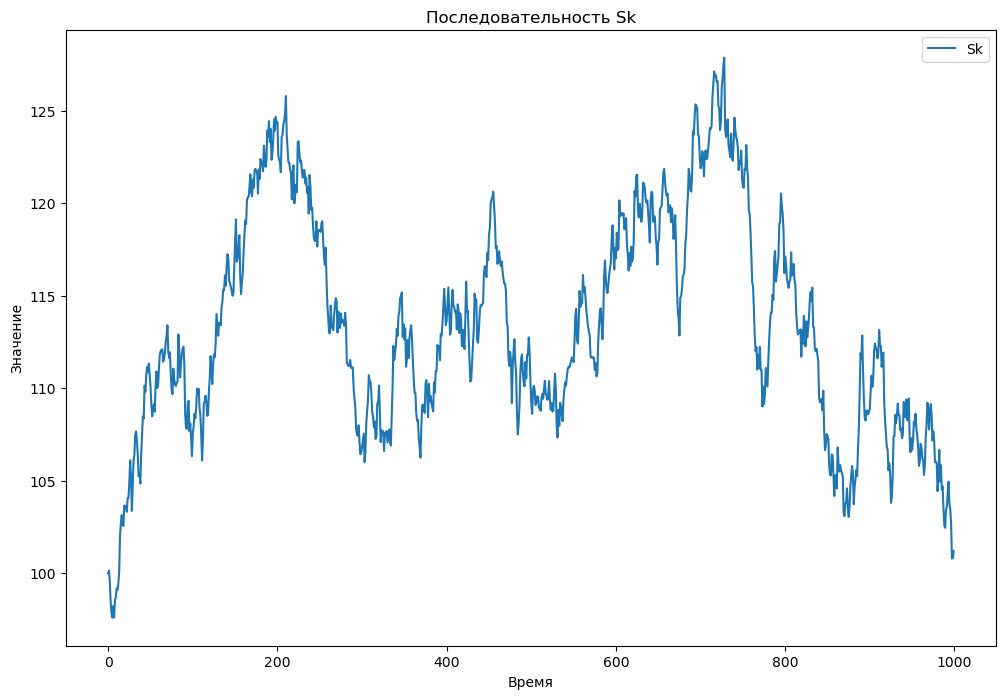

In [27]:
# 1. Замоделировать процесс (10) для S0 = 100, a = 0.5, sigma = 0.8, √delta = 0.01, k =1:10^3
k = 10**3

delta = 0.0001

def B(k):
    B = np.zeros(k)
    B[0] = 0
    for k in range(1,k):
        B[k] = B[k-1] + np.random.normal(0,0.01)
    return B
    
def S(t):
    sigma = 0.8
    a = 0.5
    S = np.zeros(t)
    So = 100
    B_RES = B(t)
    for k in range(t):
        S[k] = So*np.exp((a-((sigma**2)/2))*(k+1)*delta + sigma*B_RES[k])
    return S

result = S(k)

plt.figure(figsize=(12, 8))
plt.plot(result, label = "Sk")
plt.title("Последовательность Sk")
plt.ylabel("Значение")
plt.xlabel("Время")
plt.legend()
plt.show()

In [29]:
# 2. оценка параметров

X = np.zeros(len(result)-1)
for i in range(1,len(result)):
    X[i-1] = np.log(result[i]) - np.log(result[i-1])

mu_hat = np.sum(X)/len(X)
var_hat = np.sum((X - mu_hat)**2)/len(X)

print("оценка среднего", mu_hat)
print("оценка дисперсии", var_hat)

# обновлено, найдены оценки параметров
sigma_2 = var_hat/delta
a_hat = mu_hat/delta + sigma_2/2

print("оценка sigma^2", sigma_2)
print("оценка a", a_hat)

оценка среднего 1.1968241499362444e-05
оценка дисперсии 6.533563968315566e-05
оценка sigma^2 0.6533563968315566
оценка a 0.4463606134094027
